In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
import itertools
import contractions
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
tweets_df = pd.read_csv('snscrape_20k.csv')
tweets_df = pd.DataFrame(tweets_df)
tweets_df

,Datetime,Tweet Id,Text,Username,lang,likeCount,retweetCount,quoteCount,hashtags,place,url,Cleaned_Text
0,2022-07-30 23:59:54+00:00,1553530858719559681,@R_H_D__ @DanielTheHuman1 @StrewthQueen @Willi...,OneCodeWOLF,en,3,0,0,NaN,NaN,https://twitter.com/OneCodeWOLF/status/1553530...,r_h_d__ danielthehuman1 strewthqueen willisaos...
1,2022-07-30 23:59:33+00:00,1553530770731442176,@idsharman Indeed. I'll let us take a teensy f...,JeffreyCook74,en,1,0,0,NaN,NaN,https://twitter.com/JeffreyCook74/status/15535...,idsharman indeed. i'll let us take a teensy fr...
2,2022-07-30 23:59:01+00:00,1553530634227924995,@klucy239 @Mc3Mc336241251 @GOP actually its no...,WillNorthr,en,1,0,0,NaN,NaN,https://twitter.com/WillNorthr/status/15535306...,"klucy239 mc3mc336241251 gop actually its not, ..."
3,2022-07-30 23:58:41+00:00,1553530552954732545,#SINGAPORE: Government considering repeal of s...,LGBTMarriage,en,6,2,1,"['SINGAPORE', 'LGBT', 'EqualMarriage']",NaN,https://twitter.com/LGBTMarriage/status/155353...,singapore: government considering repeal of so...
4,2022-07-30 23:58:26+00:00,1553530488853184512,"""On A Clear Day You Can See Forever"" #musical ...",showsiveseen,en,0,0,0,"['musical', 'gay', 'Retro', 'jazz', 'psychiatr...","Place(fullName='The Black Box Theatre', name='...",https://twitter.com/showsiveseen/status/155353...,"""on a clear day you can see forever"" musical o..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2022-07-27 16:19:41+00:00,1552327878490079233,the movie has lit rally like 0.0001% lgbt cont...,moops_invasion,en,0,0,0,NaN,NaN,https://twitter.com/moops_invasion/status/1552...,the movie has lit rally like 0.0001% lgbt cont...
19996,2022-07-27 16:19:22+00:00,1552327798978666499,@Julia20526177 @AubryAndrews LGBT allies,JustUrOpinion,en,0,0,0,NaN,NaN,https://twitter.com/JustUrOpinion/status/15523...,julia20526177 aubryandrews lgbt allies
19997,2022-07-27 16:19:01+00:00,1552327709015031808,As long as lgbt are hygenic and clean and not ...,DAHmvb,en,0,1,0,NaN,NaN,https://twitter.com/DAHmvb/status/155232770901...,as long as lgbt are hygenic and clean and not ...
19998,2022-07-27 16:18:59+00:00,1552327699464704002,GOP-controlled states sue over LGBT-inclusive ...,KNWAFOX24,en,1,1,0,NaN,NaN,https://twitter.com/KNWAFOX24/status/155232769...,gop-controlled states sue over lgbt-inclusive ...


In [12]:
texts = tweets_df.filter(['Text'])
texts= tweets_df['Text'].values.tolist()
texts

["@R_H_D__ @DanielTheHuman1 @StrewthQueen @WillisaOsburn It really isn't, but good to know you'll believe any homophobic thing someone on the internet has tweeted with no founding.\nIf it were actually LGBT people supporting it our government would actually do something about it.\n\nBut it's old men with money, so they get a pass.",
 "@idsharman Indeed. I'll let us take a teensy fraction of responsibility for some parts. Like being some people's first positive imagery of the LGBT community*, the mutual aid-ish parts**, and maybe a /touch/ of relationship drama.",
 '@klucy239 @Mc3Mc336241251 @GOP actually its not, not only have child drag shows been happening despite pushback with support from the Dems and leftists but they have also taken to defending people grooming kids. Saying that calling out groomers is anti-LGBT. Somehow they got it in their minds that those are =',
 '#SINGAPORE: Government considering repeal of sodomy law along with unspecified measures to ensure ban on #LGBT ma

In [13]:
def clean_tweet(tweet):
    '''
    Function to clean a tweet text by removing the links, punctuations, hashtags, and mentions symbols
    using regex expressions.
    Parameters:
       tweet (string): Tweet text to transform.
    Returns:
       tweet_cleaned (string): Tweet without links, punctuations, hashtags, and mentions symbols.
    """
    '''
    # convert the tweet text to lowercase letters
    tweet_lower = tweet.lower()

    #remove mentions
    remove_mentions = re.sub("@[A-Za-z0-9_]+","", tweet_lower)

    #remove hashtags
    remove_hashtag = re.sub("#[A-Za-z0-9_]+","", remove_mentions)

    # #remove non ascii
    # remove_others = re.sub("[^\x00-\x7F]+", "", remove_mentions)

    # remove links, punctuations, hashtags, and etc
    text = re.sub(u"(http\S+)|([“\"”])|([#|_*@()\`])", "", remove_hashtag)

    # remove \n
    text = re.sub(r" & ", " and ", text)
    text = re.sub(r"&", " ", text)
    text = re.sub(r"[,!?.\/]", " ", text)
    text = re.sub(r"=", " equal ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"\?", " ? ", text)
    text = re.sub(r"\+", " plus ", text)
    text = re.sub(r"\n", "", text)
    text = re.sub(r":", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r";", " ", text)

    return text

In [14]:
def remove_contraction(text):
    # expanded_words = []

    # for word in text.split():
    #   # using contractions.fix to expand the shortened words
    # lower_text = text.lower()
    removed_contraction = contractions.fix(text)
    return removed_contraction

In [18]:
tweets_text_cleaned = []
tweets_text_cleaned= [remove_contraction(text) for text in texts]
print(tweets_text_cleaned[:10])

['@R_H_D__ @DanielTheHuman1 @StrewthQueen @WillisaOsburn It really is not, but good to know you will believe any homophobic thing someone on the internet has tweeted with no founding.\nIf it were actually LGBT people supporting it our government would actually do something about it.\n\nBut it is old men with money, so they get a pass.', "@idsharman Indeed. I will let us take a teensy fraction of responsibility for some parts. Like being some people's first positive imagery of the LGBT community*, the mutual aid-ish parts**, and maybe a /touch/ of relationship drama.", '@klucy239 @Mc3Mc336241251 @GOP actually its not, not only have child drag shows been happening despite pushback with support from the Dems and leftists but they have also taken to defending people grooming kids. Saying that calling out groomers is anti-LGBT. Somehow they got it in their minds that those are =', '#SINGAPORE: Government considering repeal of sodomy law along with unspecified measures to ensure ban on #LGBT

In [21]:
tweets_text_cleaned = [clean_tweet(text) for text in tweets_text_cleaned]
print(tweets_text_cleaned[:10])

['    it really is not  but good to know you will believe any homophobic thing someone on the internet has tweeted with no founding if it were actually lgbt people supporting it our government would actually do something about it but it is old men with money  so they get a pass ', ' indeed  i will let us take a teensy fraction of responsibility for some parts  like being some people s first positive imagery of the lgbt community  the mutual aid-ish parts  and maybe a  touch  of relationship drama ', '   actually its not  not only have child drag shows been happening despite pushback with support from the dems and leftists but they have also taken to defending people grooming kids  saying that calling out groomers is anti-lgbt  somehow they got it in their minds that those are  equal ', '  government considering repeal of sodomy law along with unspecified measures to ensure ban on  marriage is protected from court challenge  ', 'on a clear day you can see forever  opening night at   int

In [22]:
words_in_tweet = [tweet.lower().split() for tweet in tweets_text_cleaned]
words_in_tweet[0]

['it',
 'really',
 'is',
 'not',
 'but',
 'good',
 'to',
 'know',
 'you',
 'will',
 'believe',
 'any',
 'homophobic',
 'thing',
 'someone',
 'on',
 'the',
 'internet',
 'has',
 'tweeted',
 'with',
 'no',
 'founding',
 'if',
 'it',
 'were',
 'actually',
 'lgbt',
 'people',
 'supporting',
 'it',
 'our',
 'government',
 'would',
 'actually',
 'do',
 'something',
 'about',
 'it',
 'but',
 'it',
 'is',
 'old',
 'men',
 'with',
 'money',
 'so',
 'they',
 'get',
 'a',
 'pass']

In [23]:
all_words = list(itertools.chain(*words_in_tweet))

In [24]:
# number of words
len(all_words)

543305

In [25]:
count_words = collections.Counter(all_words)

In [26]:
# number of unique words
len(count_words)

30444

In [27]:
count_words.most_common(15)

[('the', 20299),
 ('lgbt', 17827),
 ('to', 13635),
 ('is', 12826),
 ('and', 11474),
 ('a', 10075),
 ('of', 9319),
 ('i', 8647),
 ('not', 8320),
 ('you', 7479),
 ('are', 7336),
 ('it', 7030),
 ('in', 6819),
 ('that', 6546),
 ('for', 5351)]

In [33]:
cleaned_tweets = pd.DataFrame({'Cleaned_Text': tweets_text_cleaned})
cleaned_tweets

,Cleaned_Text
0,it really is not but good to know you wil...
1,indeed i will let us take a teensy fraction ...
2,actually its not not only have child drag ...
3,government considering repeal of sodomy law ...
4,on a clear day you can see forever opening ni...
...,...
19995,the movie has lit rally like 0 0001% lgbt cont...
19996,lgbt allies
19997,as long as lgbt are hygenic and clean and not ...
19998,gop-controlled states sue over lgbt-inclusive ...


## Removing Stopwords

In [52]:
stop = stopwords.words('english')

In [53]:
# add more common words to stopwords
stop.append('lgbt')
stop.append('lgbtq')
stop.append('gay')
stop.append('lesbian')
stop.append('queer')
stop.append('homosexual')
stop.append('transgender')
stop.append('bisexual')
stop.append('people')
stop.append('plus')
stop.append('-')

In [54]:
cleaned_tweets['Cleaned_Stopwords'] = cleaned_tweets['Cleaned_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
cleaned_tweets

,Cleaned_Text,Cleaned_Stopwords
0,it really is not but good to know you wil...,really good know believe homophobic thing some...
1,indeed i will let us take a teensy fraction ...,indeed let us take teensy fraction responsibil...
2,actually its not not only have child drag ...,actually child drag shows happening despite pu...
3,government considering repeal of sodomy law ...,government considering repeal sodomy law along...
4,on a clear day you can see forever opening ni...,clear day see forever opening night interestin...
...,...,...
19995,the movie has lit rally like 0 0001% lgbt cont...,movie lit rally like 0 0001% content kuwait wa...
19996,lgbt allies,allies
19997,as long as lgbt are hygenic and clean and not ...,long hygenic clean gross fine
19998,gop-controlled states sue over lgbt-inclusive ...,gop-controlled states sue lgbt-inclusive polic...


In [55]:
words = [tweet.lower().split() for tweet in cleaned_tweets['Cleaned_Stopwords']]
words[0]

['really',
 'good',
 'know',
 'believe',
 'homophobic',
 'thing',
 'someone',
 'internet',
 'tweeted',
 'founding',
 'actually',
 'supporting',
 'government',
 'would',
 'actually',
 'something',
 'old',
 'men',
 'money',
 'get',
 'pass']

In [56]:
all_words_no_stopwords = list(itertools.chain(*words))

In [57]:
unique = collections.Counter(all_words_no_stopwords)

In [58]:
unique.most_common(15)

[('community', 3023),
 ('like', 2294),
 ('rights', 1405),
 ('would', 1387),
 ('amp', 1333),
 ('know', 1075),
 ('think', 1059),
 ('get', 1051),
 ('one', 1040),
 ('us', 1039),
 ('want', 1032),
 ('support', 894),
 ('also', 858),
 ('right', 807),
 ('even', 774)]

In [78]:
def create_wordcloud(text):
    wc = WordCloud(background_color="white", max_words = 3000, stopwords = stop, repeat = True)
    wc.generate(str(text))
    plt.figure(figsize = (15,10))
    plt.clf()
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

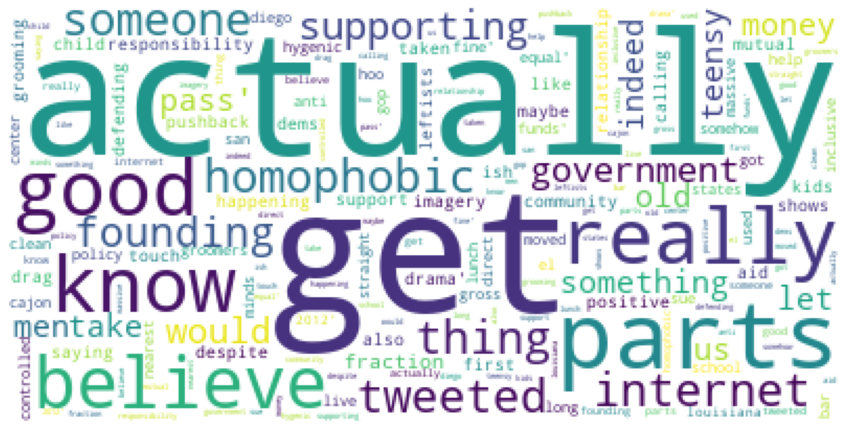

In [79]:
create_wordcloud(cleaned_tweets['Cleaned_Stopwords'].values)